In [21]:
from ooipy.request.hydrophone_request import get_acoustic_data_LF
from datetime import datetime
from pathlib import Path
import soundfile as sf
import matplotlib.pyplot as plt

In [22]:
node = 'AXEC2'

In [23]:
starttime=datetime(2025,7,30,0)
endtime=datetime(2025,7,30,12)

In [24]:
node_dict = {'AXEC2': 'RS03ECAL-MJ03E-09-HYDLFA304'}

In [25]:
refdes = node_dict[node]
refdes

'RS03ECAL-MJ03E-09-HYDLFA304'

In [26]:
date_str = datetime.strftime(starttime, "%Y_%m_%d")
date_str

'2025_07_30'

In [27]:
LF_data = get_acoustic_data_LF(
    starttime=starttime,
    endtime=endtime,
    node=node,
    verbose=True,
)   

In [28]:
LF_data

OO.AXEC2.AXEC2.HDH | 2025-07-30T00:00:00.000000Z - 2025-07-30T12:00:00.000000Z | 200.0 Hz, 8640001 samples

In [29]:
spec = LF_data.compute_spectrogram(L=2024, avg_time=20, verbose=True,)

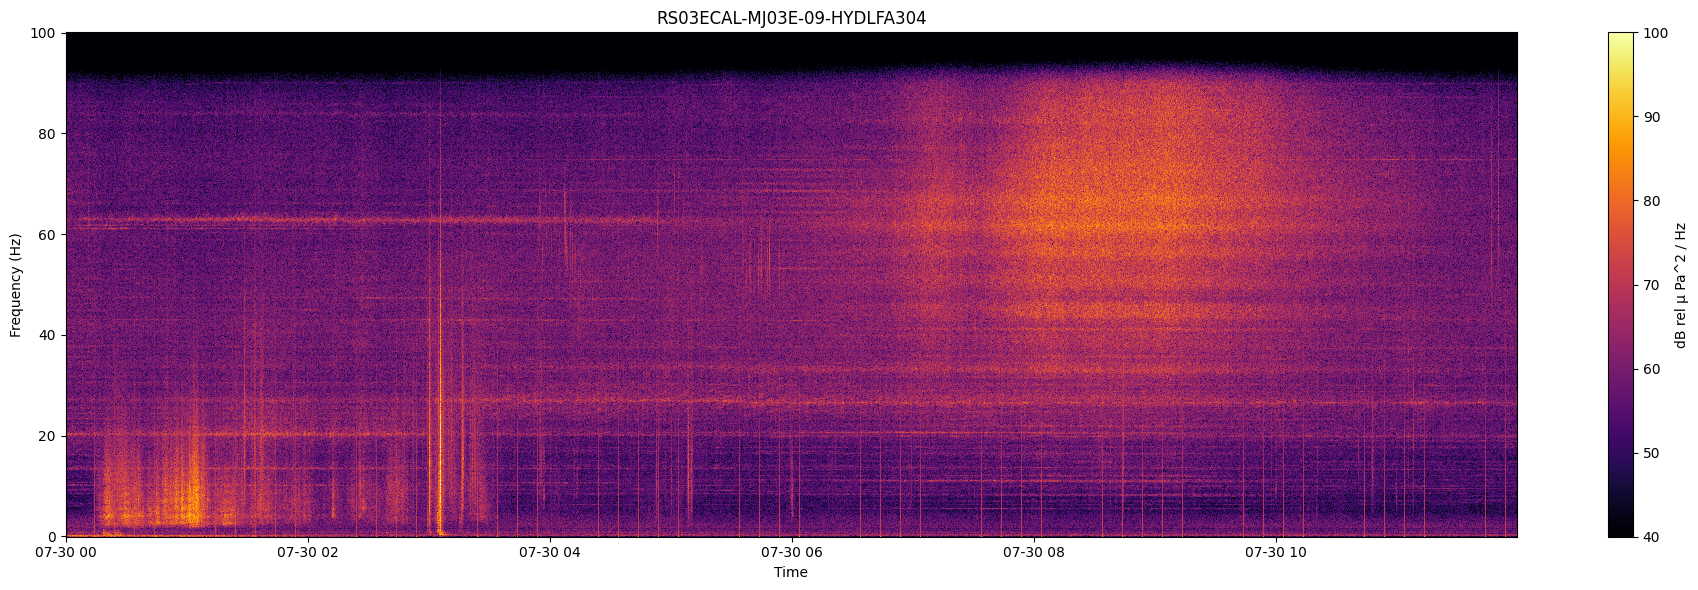

In [30]:
plt.figure(figsize=(19, 6))
pcm = plt.pcolormesh(
    spec['time'],
    spec['frequency'],
    spec.T, # freq, time             
    shading='auto',
    vmin=40,
    vmax=100,
    cmap='inferno'          
)
plt.colorbar(pcm, label=spec.attrs.get("units"))
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.title(refdes)
plt.tight_layout()
plt.show()